# XAI
We'll try to explain how the model works by finding the most important features. We'll use the SHAP library to achieve this.

In [1]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import shap

import warnings
warnings.filterwarnings('ignore')

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html


In [2]:
train = pd.read_csv('../../data/final_train.csv')
test = pd.read_csv('../../data/final_test.csv')

X_train = train.drop(columns=['booking_status'])
y_train = train['booking_status']
X_test = test.drop(columns=['booking_status'])
y_test = test['booking_status']

In [3]:
with open('../models/random_forest_final.pkl', 'rb') as f:
    model = pickle.load(f)

In [4]:
# Create a SHAP explainer
explainer = shap.TreeExplainer(model, X_train, check_additivity=False)

# Calculate SHAP values
shap_values = explainer(X_train, check_additivity=False)

100%|===================| 50783/50784 [56:35<00:00]        

In [5]:
# Save the SHAP values
with open('../../data/shap_values.pkl', 'wb') as f:
    pickle.dump(shap_values, f)

In [4]:
# Load the SHAP values
with open('../../data/shap_values.pkl', 'rb') as f:
    shap_values = pickle.load(f)

## Most important features
We'll use SHAP values to determine the most important features for the model.

In [5]:
# Computing mean SHAP values
shap_values = shap_values.values
mean_shap_values = shap_values.mean(axis=0)
mean_shap_values_class_1 = mean_shap_values[:, 1] # Selecting the mean SHAP values for class 1
mean_shap_df_class_1 = pd.DataFrame(mean_shap_values_class_1, index=X_train.columns, columns=['mean_shap_value'])
mean_shap_df_class_1 = mean_shap_df_class_1.sort_values(by='mean_shap_value', ascending=False)
mean_shap_df_class_1

,mean_shap_value
lead_time,0.014480
market_segment_type_Online,0.006199
market_segment_type_Offline,0.002593
type_of_meal_plan_Not_Selected,0.000223
market_segment_type_Complementary,0.000060
market_segment_type_Aviation,0.000024
no_of_previous_cancellations,0.000008
type_of_meal_plan_Meal_Plan_3,0.000002
free_booking,-0.000109
arrival_month_sin,-0.000125


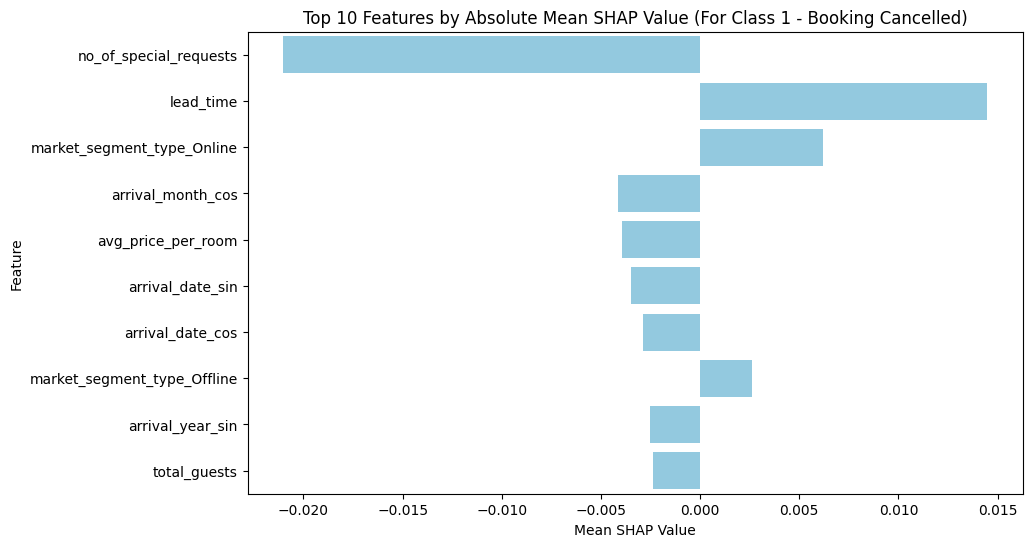

In [6]:
# Plot top 10 features (absolute SHAP values)
abs_mean_shap_df = mean_shap_df_class_1.abs().sort_values(by='mean_shap_value', ascending=False)
top_10_idx = abs_mean_shap_df.index[:10]
top_10_shap_values = mean_shap_df_class_1.loc[top_10_idx]

plt.figure(figsize=(10, 6))
sns.barplot(x='mean_shap_value', y=top_10_shap_values.index, data=top_10_shap_values, color='skyblue')
plt.title('Top 10 Features by Absolute Mean SHAP Value (For Class 1 - Booking Cancelled)')
plt.xlabel('Mean SHAP Value')
plt.ylabel('Feature')
plt.show()

On the chart we can see that the most important features are:
- `no_pf_special_requests` - number of special requests
- `lead_time` - number of days between booking and arrival
- `market_segment_type_Online` whether the booking was made via online market

Lead time being one of the most important features is not surprising. The longer the lead time, the more likely the booking is to be canceled. 

The most important feature is the number of special requests. This information could be used by the hotel, for example, to offer some discounts to customers who have more special requests. 

The third most important feature is the market segment. The online bookings are more likely to be canceled. This could be due to the fact that online bookings are easier to make and cancel, so the customers are more likely to change their minds. The hotel could try to improve its online marketing and booking system to reduce the number of cancellations.